In [1]:
# https://discord.com/channels/801214563206037524/801214563684712461/836467605283930173
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [2]:
key_to_description = {
    "baseline_paired_2021_04_05_train": "PAIRED Baseline" ,
    "static_apr22_train": "Static Baseline (old enc)",
    "random_shift_2021_04_apr26_train": "Random Shift (old enc)",     
    "dynamic_shift_2021_04_22_train": "Dynamic Shift (old enc)",
    "uberduck_no0_static_no0_apr25_train": "Static Baseline (new enc)",     
    "uberduck_no0_dynamic_no0_apr25_train": "Dynamic Shift (new enc)", 
    "random_shift_no0_train": "Random Shift (new enc)"
}

# example
fp = "run-baseline_paired_2021_04_05_train-tag-Metrics_SolvedPathLength.csv"
key = fp.split("-")[1]

# should be -> 'baseline_paired_2021_04_05_train'

label = key_to_description[key]
label
# should be -> 'PAIRED Baseline'

'PAIRED Baseline'

In [27]:
from pathlib import Path
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import collections
import pandas as pd
HOMEDIR = "/home/adam/Documents/2021-winter/ift-6756/gt-org/google-research/run_data/compiled_data/"
import seaborn as sns
import matplotlib.ticker as ticker

In [51]:
def load_data(base_dir: str) -> dict:
    base_dir = Path(base_dir)
    data = collections.OrderedDict()
    for fp in base_dir.glob("*"):
        d = pd.read_csv(fp)
        key = str(fp.name).split(".")[0]
        data[key] = d
    return data

def smooth(scalars, weight=0.8):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed


key_to_description = collections.OrderedDict({
    "baseline": "PAIRED Baseline" ,
    "dynamic" : "Dynamic Shift" ,
    "random"  : "Random Shift" ,
    "static"  : "Static Shift"
})


# save this to where you unzipped data
base_dir = Path("/home/adam/Documents/2021-winter/ift-6756/gt-org/google-research/run_data/compiled_data/")


solved_path_length = base_dir / "solved_path_len"
num_placed = base_dir / "num_placed"
distance = base_dir / "distance_to_goal"

# Load the data
spl_data = load_data(solved_path_length)
#spl_data = spl_data_dict['winter/ift']
placed_data = load_data(num_placed)
dist_data = load_data(distance)

curr = dist_data

# example
for key in curr:
    label = key_to_description[key]
    print(label)

# smoothing data example

smooth_spl_data = collections.OrderedDict()
for key in key_to_description:
    #print(key)
    df = curr[key]
    smooth_values = smooth(df['avg'], weight=0.95)
    smooth_up = smooth(df['up'], weight=0.95)
    smooth_low = smooth(df['low'], weight=0.95)
    steps = df['Step'].tolist()
    smooth_spl_data[key] = {'steps': steps, 'values': smooth_values, 'up': smooth_up, 'low': smooth_low}
    

# for key, data in smooth_spl_data.items():
#     label = key_to_description[key]
#     x_data = data['steps']
#     y_data = data['values']
    
    # add to plt...

Static Shift
Dynamic Shift
PAIRED Baseline
Random Shift


baseline
dynamic
random
static


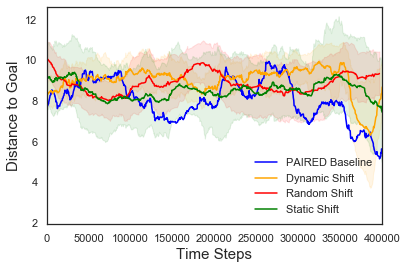

In [52]:
#smooth_spl_data
#solved_path_length
#spl_data['winter/ift'].keys()
# for key in  spl_data:
#     print(key)
#spl_data.items()

scale_y = 1000
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))


sns.set()
sns.set_style("white")

#plt.title('EMA of Distance to Goal (weight=0.95)')
plt.xlabel('Time Steps', fontsize=15)
plt.ylabel('Distance to Goal', fontsize=15)
plt.grid(False)
plt.gca().set_xlim(right=400000)
#plt.gca().set_ylim(top=100)

# COLORS = {
#     'baseline': '#2e7d32',
#     'dynamic' : '#1565c0',
#     'random'  : '#ef6c00',
#     'static'  : '#ffb300'
# }
COLORS = {
    'baseline': 'blue',
    'dynamic' : 'orange',
    'random'  : 'red',
    'static'  : 'green'
}

for key, data in smooth_spl_data.items():
    print(key)
    label = key_to_description[key]
    x_data = data['steps']
    y_data = data['values']
    plt.plot(x_data, y_data, label = key_to_description[key], color=COLORS[key])#;
    plt.fill_between(x_data, data['low'], data['up'], color=COLORS[key], alpha=.1)

#fig, ax - plt.subplots()


    
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='lower right')
#plt.show()
plt.savefig('/home/adam/Documents/2021-winter/ift-6756/gt-org/google-research/run_data/figs/dist.png', dpi=400)

    #smooth_spl_data

Dynamic Shift (old enc)
Static Baseline (new enc)
Static Baseline (old enc)
Random Shift (old enc)
Dynamic Shift (new enc)
PAIRED Baseline
Random Shift (new enc)


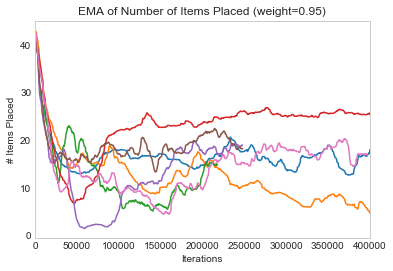

In [113]:
#smooth_spl_data
#solved_path_length
#spl_data['winter/ift'].keys()
# for key in  spl_data:
#     print(key)
#spl_data.items()

curr = placed_data

# example
for key in curr:
    label = key_to_description[key]
    print(label)


# smoothing data example

smooth_spl_data = collections.OrderedDict()
for key in key_to_description:
    df = curr[key]
    smooth_values = smooth(df['Value'], weight=0.95)
    steps = df['Step'].tolist()
    smooth_spl_data[key] = {'steps': steps, 'values': smooth_values}
    
    

plt.title('EMA of Number of Items Placed (weight=0.95)')
plt.xlabel('Iterations')
plt.ylabel('# Items Placed')
plt.grid(False)
plt.gca().set_xlim(right=400000)

for key, data in smooth_spl_data.items():
    label = key_to_description[key]
    x_data = data['steps']
    y_data = data['values']
    plt.plot(x_data, y_data, label = key_to_description[key]);

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend(loc='upper right')
#plt.show()
plt.savefig('/home/adam/Documents/2021-winter/ift-6756/gt-org/poster/avgs/placed.png', dpi=400)

    #smooth_spl_data

Static Baseline (old enc)
Dynamic Shift (new enc)
Static Baseline (new enc)
PAIRED Baseline
Dynamic Shift (old enc)
Random Shift (old enc)
Random Shift (new enc)


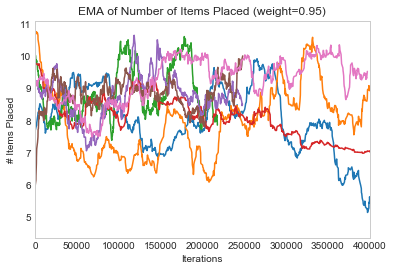

In [112]:
#smooth_spl_data
#solved_path_length
#spl_data['winter/ift'].keys()
# for key in  spl_data:
#     print(key)
#spl_data.items()


curr = dist_data

# example
for key in curr:
    label = key_to_description[key]
    print(label)


# smoothing data example

smooth_spl_data = collections.OrderedDict()
for key in key_to_description:
    df = curr[key]
    smooth_values = smooth(df['Value'], weight=0.95)
    steps = df['Step'].tolist()
    smooth_spl_data[key] = {'steps': steps, 'values': smooth_values}
    
    
    
    



plt.title('EMA of Number of Items Placed (weight=0.95)')
plt.xlabel('Iterations')
plt.ylabel('# Items Placed')
plt.grid(False)
plt.gca().set_xlim(right=400000)

for key, data in smooth_spl_data.items():
    label = key_to_description[key]
    x_data = data['steps']
    y_data = data['values']
    plt.plot(x_data, y_data, label = key_to_description[key]);

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend(loc='upper right')
#plt.show()
plt.savefig('/home/adam/Documents/2021-winter/ift-6756/gt-org/poster/avgs/dist.png', dpi=400)

    #smooth_spl_data